<div align="center">
  <img src="logo.png" alt="logo" width="500" height="400"/>
</div>


### GLOBAL LIFE EXPECTANCY ANALYSIS: DEVELOPED VS DEVELOPING COUNTRIES



### Introduction
Life expectancy is a fundamental indicator of global health and well-being, reflecting the overall health status, 
socio-economic conditions,
and quality of life within a nation. Understanding the different factors that influence it is crucial for policymakers, 
public health initiatives, and sustainable development goals. 

This project leverages a comprehensive dataset encompassing various health, economic, social determinants and demographic indicators to 
conduct a detailed analysis of life expectancy trends and drivers across the globe.


### Project Goal

The primary goal of this project is to thoroughly investigate and compare the dynamics of life expectancy in both developed and developing countries. including identifying the key factors contributing to its variation, exploring its relationships with economic prosperity, and building a model to predict life expectancy.



### Objectives
1. To analyze how infant deaths, under-five deaths, HIV/AIDS, and immunization rates (Hepatitis B, Polio, Diphtheria,measles) contribute to life expectancy and to suggest measures that can reduce deaths and improve people's health.

2. To investigate how demographic factors like population size affect life expectancy in developed and developing countries  in order to identify patterns and differences that can be used to make development policies like population census and resource allocation.

3. To evaluate how social factors such as Schooling and alcohol consumption affects life expectancy, in order to understand how improvements in education and living standards can lead to longer and healthier lives.

4. To analyze how  GDP and income composition contribute to life expectancy in order to determine whether increase in life expectancy are associated with higher economic output.

5. To build a Linear Regression model to accurately estimate life expectancy across different populations.




### Methodology
This project will use exploratory and comparative analysis, starting with data cleaning and preparation, and using visualizations to reveal distinct patterns and influencing factors

### Expected Outcomes
This project is expected to provide valuable insights into the factors influencing life expectancy globally. The findings will contribute to a better understanding of which interventions and socio-economic improvements have the most significant impact on human longevity and overall societal development.



### Data Preparation and Cleaning

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Loading the data set

In [14]:
df = pd.read_csv('Life_Expectancy_Data.csv')
print('\nInformation about the dataset:')
df.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   i

#### First 5 rows of the data set

In [15]:

print('First 5 rows of the dataset:')
print(df.head())

First 5 rows of the dataset:
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0              263   
1  Afghanistan  2014  Developing              59.9              271   
2  Afghanistan  2013  Developing              59.9              268   
3  Afghanistan  2012  Developing              59.5              272   
4  Afghanistan  2011  Developing              59.2              275   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624           65      1154  ...   
1             64     0.01               73.523582           62       492  ...   
2             66     0.01               73.219243           64       430  ...   
3             69     0.01               78.184215           67      2787  ...   
4             71     0.01                7.097109           68      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS      

#### Summary of the dataset (index dtype and columns, non-null values and memory usage)

In [16]:
print('\nDescriptive statistics of the dataset:')
print(df.describe())


Descriptive statistics of the dataset:
              Year  Life expectancy   Adult Mortality  infant deaths  \
count  1649.000000       1649.000000      1649.000000    1649.000000   
mean   2007.840509         69.302304       168.215282      32.553062   
std       4.087711          8.796834       125.310417     120.847190   
min    2000.000000         44.000000         1.000000       0.000000   
25%    2005.000000         64.400000        77.000000       1.000000   
50%    2008.000000         71.700000       148.000000       3.000000   
75%    2011.000000         75.000000       227.000000      22.000000   
max    2015.000000         89.000000       723.000000    1600.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  1649.000000             1649.000000  1649.000000    1649.000000   
mean      4.533196              698.973558    79.217708    2224.494239   
std       4.029189             1759.229336    25.604664   10085.802019   
min       0.010

#### Check for the number of missing values in each column

In [17]:
print('\nNumber of missing values in each column:')
print(df.isnull().sum())


Number of missing values in each column:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


#### Calculate the percentage of missing values in each column

In [18]:
missing_percentage = df.isnull().mean() * 100
print('\nPercentage of missing values in each column:')
print(missing_percentage)


Percentage of missing values in each column:
Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64


### Check for Outliers 

In [19]:

# Select numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    outlier_info = {}
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_count = outliers.shape[0]

        if outlier_count > 0:
            outlier_info[col] = outlier_count
    
    return outlier_info

# Detect outliers
outliers = detect_outliers_iqr(numeric_df)

# Display columns with outliers and the count of outliers in each
for col, count in outliers.items():
    print(f"{col}: { count } outliers")


Life expectancy : 39 outliers
Adult Mortality: 54 outliers
infant deaths: 199 outliers
Alcohol: 2 outliers
percentage expenditure: 187 outliers
Hepatitis B: 165 outliers
Measles : 297 outliers
under-five deaths : 222 outliers
Polio: 142 outliers
Total expenditure: 7 outliers
Diphtheria : 134 outliers
 HIV/AIDS: 299 outliers
GDP: 208 outliers
Population: 233 outliers
 thinness  1-19 years: 77 outliers
 thinness 5-9 years: 78 outliers
Income composition of resources: 48 outliers
Schooling: 16 outliers


 ### Winsorization to Handle Outliers

In [20]:

# Select numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Winsorize (cap) outliers based on IQR
def winsorize_iqr(data):
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers
        data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
    
    return data

# Apply winsorization
df[numeric_df.columns] = winsorize_iqr(numeric_df)


print("Outliers have been handled using winsorization.")


Outliers have been handled using winsorization.


### Confirming no outliers in the data set

In [21]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

def check_outliers(data, columns):
    outlier_found = False
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        
        if not outliers.empty:
            outlier_found = True
            print(f"Outliers found in column '{col}':")
            print(outliers[[col]])
    
    if not outlier_found:
        print("No outliers found in the dataset!")

check_outliers(df, numeric_cols)


No outliers found in the dataset!


### Objective 1 
#### To analyze how infant deaths, under-five deaths, HIV/AIDS, and immunization rates (Hepatitis B, Polio, Diphtheria,measles) contribute to life expectancy and to suggest measures that can reduce deaths and improve people's health.


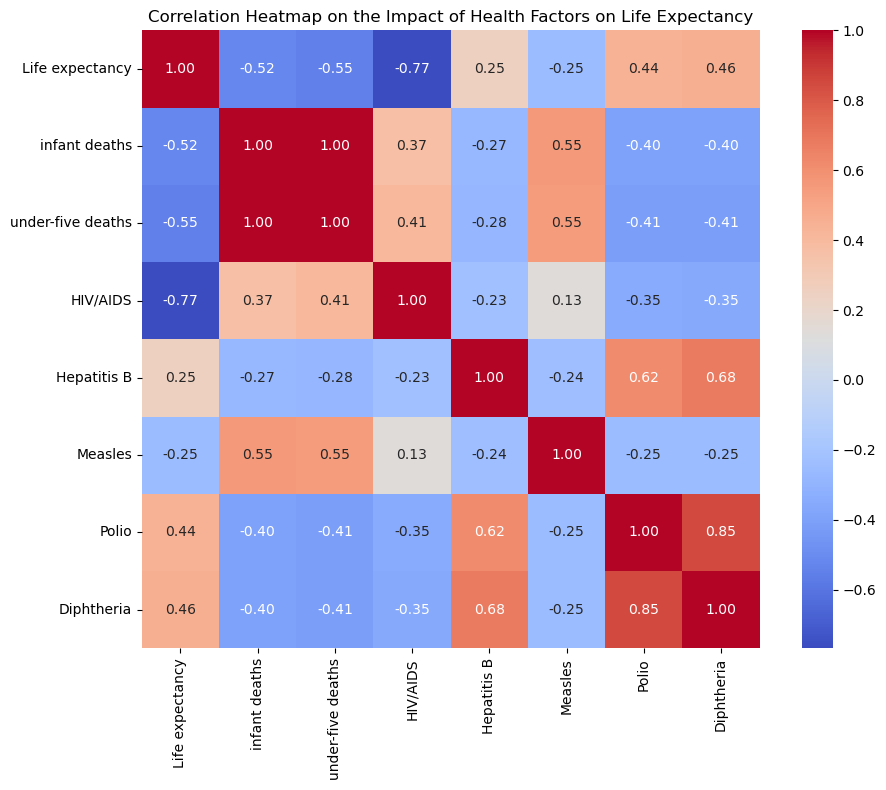

In [22]:
# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Select relevant columns 
relevant_columns = [
    'Life expectancy', 'infant deaths', 'under-five deaths',
    'HIV/AIDS', 'Hepatitis B', 'Measles', 'Polio', 'Diphtheria'
]

# Drop rows with missing values in the selected columns
df_corr = df[relevant_columns].dropna()

# Compute correlation matrix
correlation_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap on the Impact of Health Factors on Life Expectancy")
plt.tight_layout()
plt.show()


### Insights

 **HIV/AIDS (~ -0.56)**  
  This is a strong negative correlation. It means that in countries with higher rates of HIV/AIDS, people tend to live much shorter lives. This is because HIV/AIDS significantly weakens the immune system, increasing the risk of early death.

 **Under-Five Deaths (~ -0.20)**  
  This is a moderate negative correlation. Like infant deaths, a high number of under-five deaths indicates poor healthcare for young children, lack of vaccines, clean water, nutrition, or treatment for common childhood illnesses. Since many deaths occur before age five, they pull the life expectancy figure down.

 **Diphtheria Immunization (~ +0.47)**  
  This is a moderate positive correlation. Diphtheria is a deadly respiratory disease. Widespread immunization means fewer deaths from preventable diseases, especially in childhood. Countries with strong immunization coverage also tend to have better healthcare systems improving life expectancy.

 **Hepatitis B Immunization (~ +0.33)**  
  This shows a moderate positive correlation. Hepatitis B can lead to liver cancer and failure. Preventing it through vaccines helps reduce long-term health complications and deaths. It also suggests access to essential preventive care, which supports longer, healthier lives.

### Deductions

 Vaccination programs (Polio, Diphtheria, Hepatitis B) have a clear positive effect on life expectancy, particularly in countries where infectious diseases are more prevalent.
 
 HIV/AIDS remains a critical threat, particularly in developing countries where access to drugs may be limited.

 Infant and under-five mortality are both strongly linked to healthcare quality and maternal/child health services.

### Recommendations

**For Developing Countries**  

   Ensure vaccines for Hepatitis B, Polio, Diphtheria, and Measles are accessible.  

   Increase education, testing, and access to drugs through national HIV programs.  

   Reduce infant and under-five mortality through community-based maternal care, nutritional support, and skilled birth attendance.

**For Developed Countries**  

   Maintain high immunization rates to prevent resurgence of preventable diseases (e.g., measles outbreaks).  

   Support global health programs through funding and research to help developing nations.  

   Enhance HIV/AIDS education to reduce stigma and sustain prevention efforts even if prevalence is low.

### Objective 2

#### To investigate how demographic factors like population size affect life expectancy in developed and developing countries  in order to identify patterns and differences that can be used to make development policies like population census and resource allocation.

###  Scatter Plot: Life Expectancy vs Population by Country Status

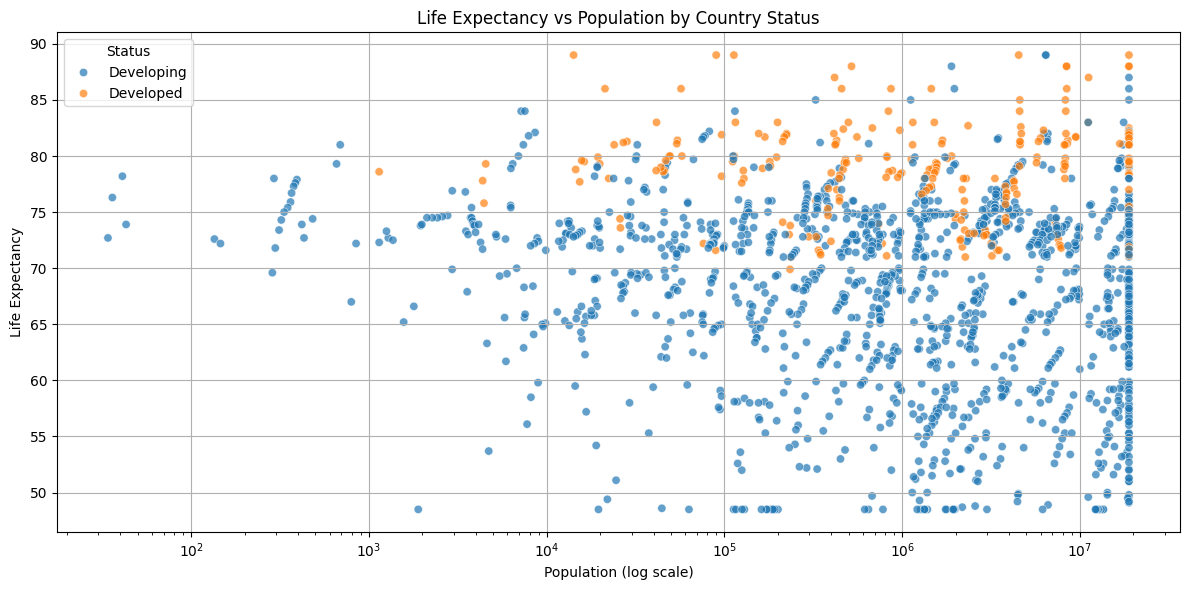

In [23]:
# Plot: Scatterplot of Life Expectancy vs Population
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='Population',
    y='Life expectancy',
    hue='Status',
    alpha=0.7
)
plt.xscale('log')  # Optional: log scale for better readability
plt.title('Life Expectancy vs Population by Country Status')
plt.xlabel('Population (log scale)')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.tight_layout()
plt.show()

### Explanations
##### Life expectancy tends to be higher in developed countries, regardless of population size.
##### There is no clear link between population and life expectancy, especially in developing countries.

### Box Plot: Life Expectancy by Country Status

C:\Users\H P\AppData\Local\Temp\ipykernel_7316\2498402669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


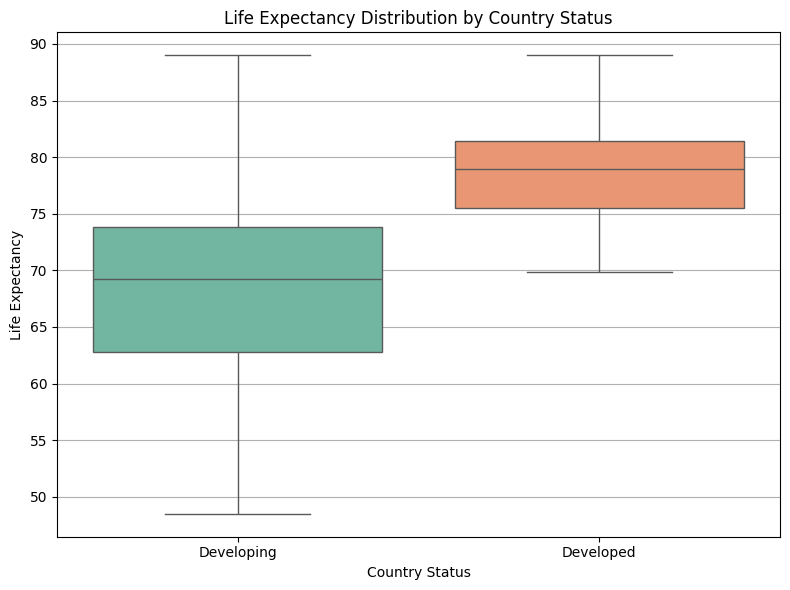

In [25]:
# Boxplot of Life Expectancy grouped by Status
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Status',
    y='Life expectancy',
    palette='Set2'
)
plt.title('Life Expectancy Distribution by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Life Expectancy')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### Explanations
##### Developed countries have higher and more consistent life expectancy compared to developing ones.
##### This shows that development status has a stronger impact on life expectancy than population size

### Deductions
##### Development status is a stronger determinant of life expectancy than population size.

##### Developed countries maintain high life expectancy regardless of population, while developing countries show more variation and lower averages.

##### Population alone does not predict life expectancy, indicating the importance of other factors like healthcare, education, and infrastructure.

## Recommendations for Objective 2
##### Policymakers in developing countries should prioritize investments in public health, education, and infrastructure to improve life expectancy.

##### Population data should still be used for planning—such as in census design and resource allocation—but must be combined with social indicators for effective development strategies.

##### Support from international organizations can help bridge health and resource gaps in high-population, low-life-expectancy countries

### Objective 3: 
#### To evaluate how social factors such as Schooling and alcohol consumption affects life expectancy, in order to understand how improvements in education and living standards can lead to longer and healthier lives.

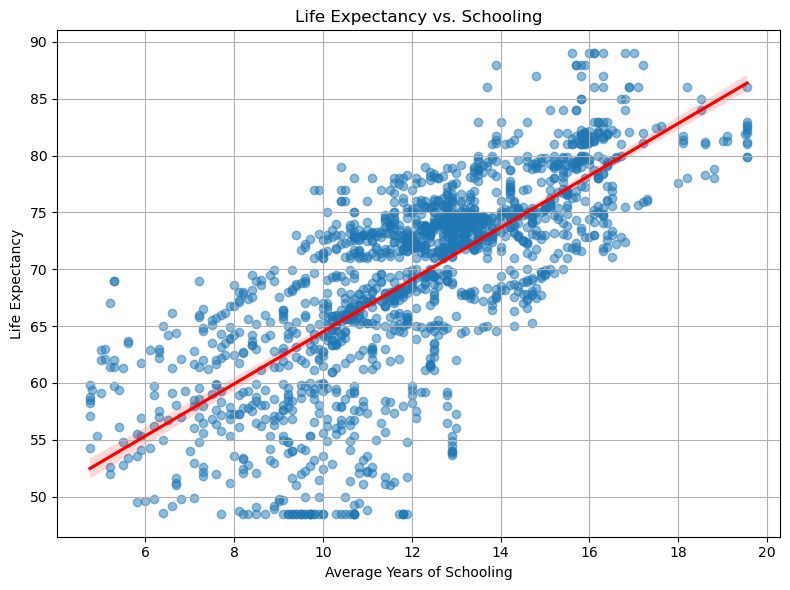

In [71]:
# Scatter Plot: Life Expectancy vs. Schooling (with regression line)
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df,
    x='Schooling',
    y='Life expectancy',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title('Life Expectancy vs. Schooling')
plt.xlabel('Average Years of Schooling')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.tight_layout()
plt.show()


### Explanation for the scatter plot above
This scatter plot visualizes the relationship between the average years of schooling and life expectancy for each country or data point in the dataset. Each point represents a country over the years and the red reression line represents the overall trend, that contries with higher average years of schooling tend to have higher life expectancy. This supports the idea that education is a key social factor contributing to longer and healthier lives, most probably due to better health awareness, improved job opportunities and access to healthcare.

### Insights
 There is a clear positive trend: as the average years of schooling increase, life expectancy also tends to increase.
 Countries (or years) with higher education levels generally have higher life expectancy.
 The regression line confirms a strong association between education and longevity.



### Deductions
 Education is a significant social determinant of health. More schooling likely leads to better health awareness, improved economic opportunities, and greater access to healthcare.
 Investments in education can have long-term benefits for population health and longevity.


### Recommendations

#### 1.Education (Schooling) and Life Expectancy
#### Developing Countries:

Increase investment in education infrastructure to ensure access to quality schooling for all children, especially girls and marginalized groups.

Promote adult education and literacy programs to improve health awareness and empower communities to make informed health decisions.

Integrate health education into school curricula to teach healthy behaviors early and reduce preventable diseases.

#### Developed Countries:

Maintain high standards in education and continue to innovate in teaching methods and curricula.

Focus on lifelong learning and health education to address emerging health risks and promote healthy aging.

Support global education initiatives to help developing countries improve their schooling systems.


### Life Expectancy by Alcohol Consumption

C:\Users\david\AppData\Local\Temp\ipykernel_12956\1946024910.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


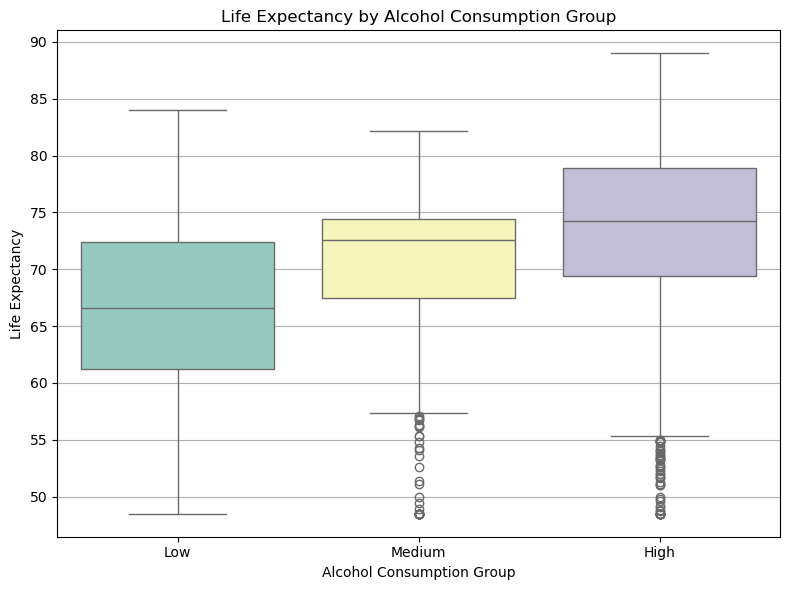

In [72]:
# Box Plot: Life Expectancy by Alcohol Consumption Groups
# Create alcohol consumption groups
alcohol_bins = [df['Alcohol'].min()-1, 2.5, 5, df['Alcohol'].max()+1]
alcohol_labels = ['Low', 'Medium', 'High']
df['Alcohol_Group'] = pd.cut(df['Alcohol'], bins=alcohol_bins, labels=alcohol_labels)

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Alcohol_Group',
    y='Life expectancy',
    palette='Set3'
)
plt.title('Life Expectancy by Alcohol Consumption Group')
plt.xlabel('Alcohol Consumption Group')
plt.ylabel('Life Expectancy')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### Explanation for the box plot above

### Insights
- The median life expectancy is generally lower in the "High" alcohol consumption group compared to "Low" and "Medium" groups.
- There is greater variability (wider spread) in life expectancy among countries with high alcohol consumption.
- Some outliers exist, but the overall trend suggests that higher alcohol intake is associated with reduced life expectancy.


### Deductions
- Excessive alcohol consumption is a risk factor for many diseases and premature death, which negatively impacts national life expectancy.
- Countries with lower alcohol consumption tend to have higher and more consistent life expectancy.


#### Recommendations
#### 2.Alcohol Consumption and Life Expectancy
#### Developing Countries:

Implement public health campaigns to raise awareness about the dangers of excessive alcohol consumption.

Strengthen regulations on alcohol sales and advertising, and enforce minimum age requirements.

Provide community-based support and treatment for alcohol misuse and addiction.

#### Developed Countries:

Continue monitoring and regulating alcohol consumption through taxation, advertising restrictions, and public health messaging.

Promote responsible drinking behaviors and provide accessible support services for those at risk of alcohol misuse.

Share best practices and resources with developing countries to help them address rising alcohol-related health issues.

General Recommendation for Both Groups
Cross-sector collaboration: Governments, NGOs, and international organizations should work together to address both education and alcohol-related health challenges, sharing knowledge and resources to maximize impact globally.

### Objective 4: 
#### To analyze how  GDP and income composition contribute to life expectancy in order to determine whether increase in life expectancy are associated with higher economic output.

### GDP vs Life Expectancy in Developed & Developing Countries

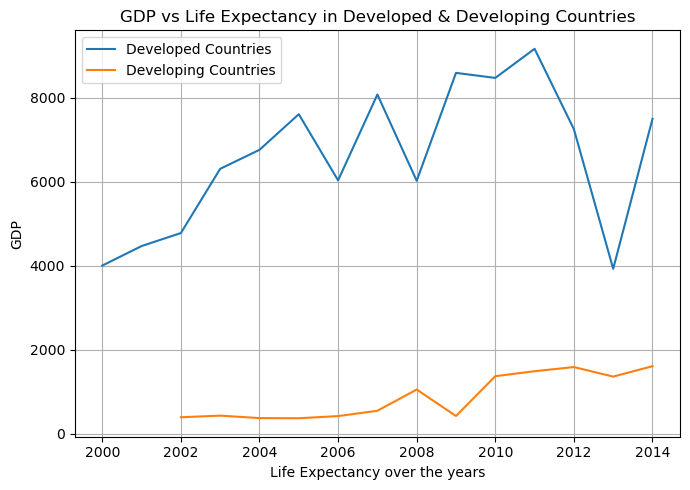

In [73]:
df = df.dropna(subset=["GDP", "Life expectancy", "Year"])

# 1. Define country groups
developed_countries = ['Italy', 'Germany', 'Malta', 'Poland', 'Bulgaria']
developing_countries = ['India', 'Nigeria', 'Bangladesh', 'Kenya', 'Zambia']

# 2. Prepare data function: filter by countries, group by year, calculate averages
def prepare_avg_data(df, countries):
    subset = df[df["Country"].isin(countries)]
    avg_data = subset.groupby("Year")[["Life expectancy", "GDP"]].mean().reset_index()
    return avg_data

developed_avg = prepare_avg_data(df, developed_countries)
developing_avg = prepare_avg_data(df, developing_countries)

# 3. Plotting
plt.figure(figsize=(7, 5))
plt.plot(developed_avg["Year"], developed_avg["GDP"], label="Developed Countries")
plt.plot(developing_avg["Year"], developing_avg["GDP"], label="Developing Countries")

# 4. Customize plot
plt.title("GDP vs Life Expectancy in Developed & Developing Countries")
plt.xlabel("Life Expectancy over the years")
plt.ylabel("GDP")
plt.legend()
plt.grid(True)
plt.tight_layout()

# 6. Show plot
plt.show()


### Explanation of the above graph 
This is a line graph that displays the relationship between GDP (Gross Domestic Product) and life expectancy over time for two groups: developed countries and developing countries. 
The x-axis represents the years, while the y-axis shows the average GDP. Two lines represent the trends for developed and developing countries, respectively.




### Insights 
The graph shows that developed countries consistently have much higher GDP values compared to developing countries.

Both groups exhibit fluctuations in GDP over the years, but developed countries have more pronounced changes.

The GDP of developing countries remains relatively low and stable, with slight increases over time.

### Deductions
There is a general trend where increases in life expectancy corresponds to increases in GDP, Impying that healthier populations tend to be more productive, supporting economic growth

Developed countries start with both higher life expectancy and GDP levels. This implies that their growth is steadier since they have already achieved high development.

Developing countries show modest but steady growth, with a small spike around 2008 and 2010, this implies that their GDP remains relatively low indicating slower but stable economic expansion

### Recommendations
#### For Developing Countries:
Invest in healthcare infrastructure to improve life expectancy and economic productivity.

Promote education and skills training to create a capable workforce

#### For Developed Countries:
Sustain high health standards through continued investment in healthcare innovation.

Focus on quality of life and preventive care to reduce healthcare costs


### Income Composition vs Life Expectancy in Developed & Developing Countries

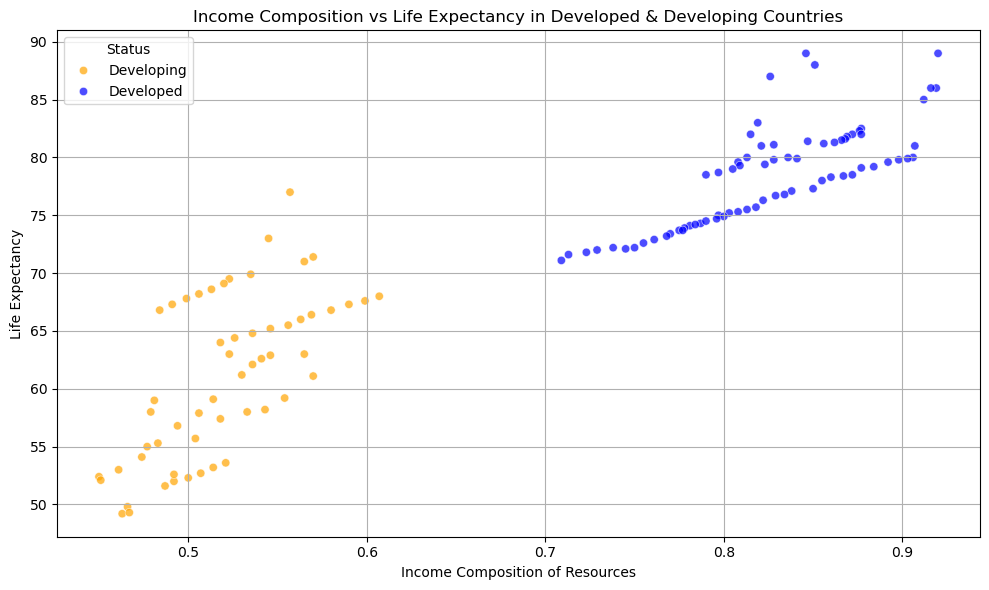

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define country groups
developed_countries = ['Italy', 'Germany', 'Malta', 'Poland', 'Bulgaria']
developing_countries = ['India', 'Nigeria', 'Bangladesh', 'Kenya', 'Zambia']

# 'Status' column to classify countries
df['Status'] = df['Country'].apply(lambda x: 'Developed' if x in developed_countries else ('Developing' if x in developing_countries else 'Other'))

#include only developed and developing countries
plot_df = df[df['Status'].isin(['Developed', 'Developing'])].dropna(subset=['Income composition of resources', 'Life expectancy'])

# Plot scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=plot_df,
    x='Income composition of resources',
    y='Life expectancy',
    hue='Status',
    alpha=0.7,
    palette={'Developed': 'blue', 'Developing': 'orange'}
)

plt.title('Income Composition vs Life Expectancy in Developed & Developing Countries')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.tight_layout()
plt.show()


### Explanation of the above graph
This is a scatter plot that displays the relationship between "Income Composition of Resources" and "Life Expectancy" for two groups: developed countries (blue) and developing countries (orange).

The x-axis represents "Income Composition of Resources," and the y-axis shows "Life Expectancy."

Developed countries generally show higher values for both income composition and life expectancy, clustered towards the top-right of the graph, while developing countries are grouped towards the bottom-left, indicating lower values for both metrics. Both groups demonstrate a positive correlation, where higher income composition is associated with increased life expectancy

### Insights
Positive Correlation: The graph clearly shows a positive correlation: as the "Income Composition of Resources" increases, "Life Expectancy" also tends to increase for both developed and developing countries.

Significant Disparity: There's a substantial gap in both "Income Composition of Resources" and "Life Expectancy" between developed and developing countries, with developed countries having significantly higher values in both metrics.

### Deductions 

Economic Development and Health: Countries with a higher "Income Composition of Resources" generally exhibit higher life expectancy, suggesting a strong link between economic structure (or resource utilization) and public health outcomes.

Path to Improvement for Developing Nations: The positive trend for developing countries suggests that improving their "Income Composition of Resources" is a key pathway to increasing life expectancy and narrowing the gap with developed nations.

### Recommendations
#### For Developing Countries:
Diversify Income Sources: Focus on policies that improve and diversify the "Income Composition of Resources" to positively impact life expectancy.

Invest in Human Capital: Prioritize investments in health, education, and social services, as these are intrinsically linked to both income composition and life expectancy.

#### For Developed Countries:
Maintain Sustainable Resource Management: Continue policies that ensure a high "Income Composition of Resources" to sustain high life expectancy.



<div align="center">
  <img src="regression.png" alt="logo" width="500" height="400"/>
</div>


### Objective 5. To build a Linear Regression model to accurately estimate life expectancy across different populations.



### Tasks

#### To build an effective regression model for predicting life expectancy,  we will follow the steps outlined below:

### 1. Import Libraries and Load Data  
   ####  import Python libraries and load the life expectancy dataset.

### 2. Data Preprocessing:
   ####  prepare data for modeling

### 3. Feature Selection and Engineering: 
   #### Select and engineer relevant features to improve model performance.

### 4. Data Splitting:
 ####  Split the dataset into training and testing sets to evaluate model performance on unseen data.

### 5. Feature Scaling: 
  #### Normalize or standardize features.

### 6. Model Training: 
   #### Train a regression model(Linear Regression).

### 7. Model Evaluation: 
  #### Assess model performance using suitable metrics (RMSE, R²).

### 8. Cross-Validation: 
  #### Perform cross-validation to ensure the robustness and generalizability of the model.

### 9. Feature Impact Analysis:  
   #### Evaluate how newly engineered features influence model performance.

### 10. Model Saving and Deployment:  
#### Save the model for future predictions.



### Task 1  Imports and Data Loading

In [9]:
import numpy as np
import pandas as pd
# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### Task 2 Preprocessing 

In [10]:
df = pd.read_csv('Life_Expectancy_Data.csv')
df.columns = df.columns.str.strip()

# Drop 'Country' for simplicity 
df = df.drop(columns=['Country'])

# Encode 'Status' (Developed/Developing) to numeric
df['Status'] = df['Status'].map({'Developed': 1, 'Developing': 0})



### Task 3  Feature Selection and Engineering

In [11]:
# List all columns
#print("Available columns:")
#print(df.columns.tolist())

# Select features to use for prediction (excluding the target 'Life expectancy')

features = [
    'Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
    'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths',
    'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Income composition of resources',
    'Schooling'
]

target = 'Life expectancy'

X = df[features]
y = df[target]

# Display the shape of feature matrix and target vector
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (1649, 18)
Target shape: (1649,)


### Explanation
#### The feature matrix X contains all the features selected to estimate life expectancy. It has a shape of (1649, 18), meaning it includes 1,649 observations (rows) and 18 features (columns).

#### The target vector y represents the life expectancy values we aim to predict. It has a shape of (1649,), indicating that there is one target value for each of the 1,649 observations.

#### This confirms that each row of input features corresponds to one target value, ensuring the dataset is properly aligned for regression model training.

### Task 4 Data Splitting
#### We split the dataset into training and test sets. The training set is used to train the model, while the test set is used to evaluate its performance on unseen data.

In [12]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print the number of samples in each set
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 1319
Test set size: 330


### Explanation
#### To evaluate the model’s ability to generalize to new, unseen data, the dataset was split into two parts:

#### Training set (80%): Used to train the machine learning model.

#### Test set (20%): Used to evaluate the model’s performance on data it hasn't seen before.

#### With a total of 1,649 records, the split resulted in:

#### 1,319 samples in the training set

#### 330 samples in the test set

#### This split ensures that the model has sufficient data to learn from while also allowing for a reliable assessment of its predictive performance.

### Task 5 Feature Scaling 
#### To ensure all features contribute equally to the model, we scale the feature values. 

In [26]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the scaled features
print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Scaled test features shape: {X_test_scaled.shape}")

Scaled training features shape: (1319, 18)
Scaled test features shape: (330, 18)


### Explanation
#### Scaled training features shape: (1319, 18)
#### This means the training set contains 1319 samples (rows) and 18 features (columns). Each feature has been standardized so that it has a mean of 0 and a standard deviation of 1.

#### Scaled test features shape: (330, 18)
#### This shows the test set has 330 samples, also with the same 18 standardized features as the training set.
#### Ensuring both sets have the same number of features is crucial for making accurate predictions.



### Task 6 Model Training
#### Here, we train a regression model using the scaled training data. The goal is to enable the model to learn the patterns and relationships between the choosen input features and the target variable, life expectancy.
#### Once trained, the model should be able to make accurate predictions when given new, unseen data.



### 6.1 Model Initialization
#### We start by creating an instance of the LinearRegression model and train it using the scaled training data (X_train_scaled, y_train). This allows the model to learn how each input feature influences life expectancy

#### This model tries to find the best-fitting line that explains the relationship between the input features and the target variable (life expectancy).

In [14]:
# Initialize the linear regression model
lr = LinearRegression()



### 6.2 Training the Model
#### After training, we use the model to make predictions on the scaled test set (X_test_scaled). This helps us evaluate how well the model generalizes to unseen data. During this step, the model learns patterns and relationships in the data.

In [15]:
# Train the model using the scaled training data
lr.fit(X_train_scaled, y_train)


LinearRegression()

### 6.3 Making Predictions
#### After the model has learned from the training data, we use it to predict life expectancy on the scaled test set (X_test_scaled). This gives us an idea of how well the model performs on new, unseen data.

In [16]:
# Predict life expectancy on test set
y_pred = lr.predict(X_test_scaled)


### Task 7 Model Evaluation  
#### Assess model performance using suitable metrics (RMSE, R²).

#### We evaluate the performance of the trained regression model using the test set. This step helps us understand how well the model generalizes to new, unseen data.

#### metrics for regression evaluation are:

#### Root Mean Squared Error (RMSE): Measures the average difference between predicted and actual values. Lower RMSE indicates better performance.

#### R² Score (Coefficient of Determination): Indicates how well the model explains the variability of the target variable. A score closer to 1 means better fit.

### Metric Calculation:

In [18]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


### Results:

In [20]:
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Root Mean Squared Error (RMSE): 3.58
R² Score: 0.82


### Explanation 
#### Root Mean Squared Error (RMSE): 3.58
#### This means that, on average, the model's predictions are about 3.58 years off from the actual life expectancy values. A lower RMSE indicates better predictive accuracy. Since life expectancy is typically measured in years, this gives a direct sense of the average prediction error.

#### R² Score: 0.82
#### The R² score (the coefficient of determination) indicates that 82% of the variability in life expectancy can be explained by the model using the input features.

#### An R² of 1.0 would mean perfect prediction.

#### An R² of 0.82 is considered very good for many real-world regression problems.

#### The model performs well: it explains most of the variation in life expectancy, with predictions deviating from actual values by only around 3.6 years on average

### Visualization Using a Scatter Plot

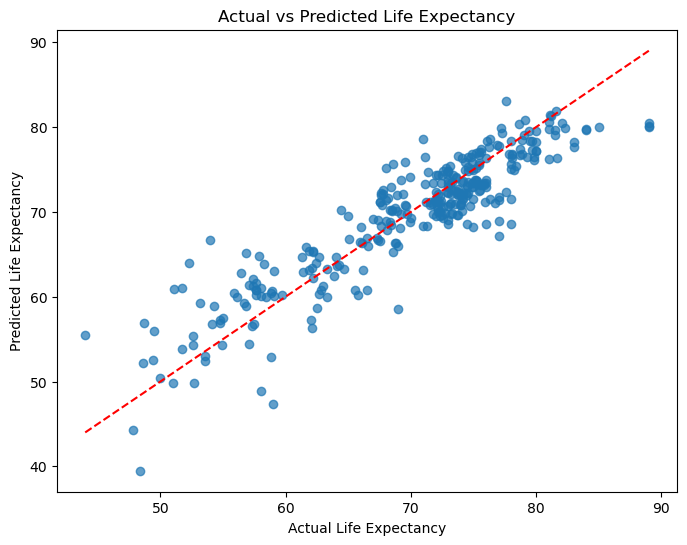

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


### Interpretation of the Graph
#### The scatter plot compares the actual life expectancy values (on the x-axis) with the predicted values from the model (on the y-axis).

#### Each dot represents one country or data point in the test set.

#### The red dashed line represents the ideal situation where the predicted value exactly equals the actual value (i.e., perfect prediction).

#### The closer the points are to the red line, the better the model’s predictions.

### Deductions 
####  Most points cluster around the red line, showing that the predictions are generally close to the true values.

####  A few points are slightly off the line, indicating minor prediction errors, which is expected in real-world data.

#### There are no extreme outliers, suggesting the model is stable and reliable across the test data.

### Conclusion
#### The graph shows that the model’s predictions are quite accurate, with most predicted values closely matching the actual life expectancy. This supports the strong performance indicated by the RMSE and R² metrics.

### Task 8 Cross-Validation:
#### Perform cross-validation to ensure the robustness and generalizability of the models.

#### Cross-validation helps assess how well a model generalizes to unseen data. Instead of relying on just one train-test split, we divide the dataset into k equally sized folds (subsets). The model is trained on k–1 folds and tested on the remaining fold. This process is repeated k times, each time with a different fold used for testing.

In [22]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation using the scaled data
cv_scores = cross_val_score(
    lr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error'
)
cv_rmse_scores = np.sqrt(-cv_scores)

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print(f"Average CV RMSE: {cv_rmse_scores.mean():.2f}")

Cross-Validation RMSE Scores: [3.65488203 3.62403051 3.53440973 3.68775984 3.57688802]
Average CV RMSE: 3.62


### Explanation 
#### Cross-Validation RMSE Scores:
#### [3.65, 3.62, 3.53, 3.69, 3.58]
#### These values represent the Root Mean Squared Error (RMSE) for each of the 5 validation folds. The scores are fairly consistent, which suggests that the model is performing reliably across different subsets of the training data.


### Average CV RMSE: 3.62

#### This value gives an overall estimate of how much, on average, the model's predictions deviate from the actual life expectancy values (on the training data). An RMSE of 3.62 means that the model's predictions are typically within ±3.62 years of the true values.

### Conclusion 
#### The model has stable performance across all folds, indicating that it generalizes well to different samples.

#### The Average RMSE is close to the test set RMSE (3.58), confirming that the model is not overfitting or underfitting severely.

### Task 9 Feature Impact Analysis: 
#### Evaluate how newly engineered features influence model performance.

#### Understanding the impact of each feature helps us determine which factors are most influential in predicting life expectancy. In the case of Linear Regression, the model learns a coefficient (weight) for each input feature that indicates how much that feature contributes to the prediction.

#### Positive Coefficients: A positive value means that an increase in the feature leads to an increase in predicted life expectancy.

#### Negative Coefficients: A negative value indicates that higher values of the feature are associated with lower life expectancy.

#### Magnitude of Coefficient: The larger the absolute value, the stronger the impact of that feature on the prediction (whether positive or negative).

Feature Importance (Linear Regression Coefficients):
infant deaths                      10.361453
Schooling                           2.738916
Income composition of resources     1.800627
BMI                                 0.651904
percentage expenditure              0.626661
Status                              0.331931
Diphtheria                          0.307484
Total expenditure                   0.266767
Polio                               0.168788
GDP                                 0.153306
Population                          0.045458
Measles                            -0.048037
Hepatitis B                        -0.172649
Year                               -0.466285
Alcohol                            -0.551584
Adult Mortality                    -2.092451
HIV/AIDS                           -2.776481
under-five deaths                 -10.692049
dtype: float64


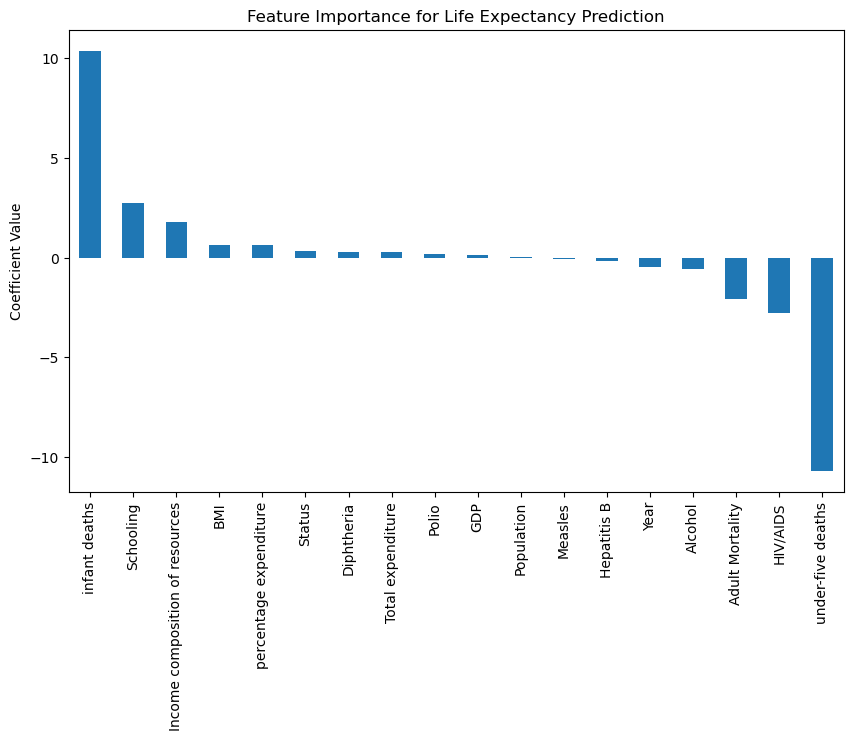

In [24]:
# Feature impact for Linear Regression: show coefficients
feature_importance = pd.Series(lr.coef_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print("Feature Importance (Linear Regression Coefficients):")
print(feature_importance)

#Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance for Life Expectancy Prediction')
plt.ylabel('Coefficient Value')
plt.show()

### Explanation

#### These are the coefficients (weights) assigned to each feature by the linear regression model. They tell us how each feature affects life expectancy, assuming all other features are held constant.

#### Positive values = the feature increases life expectancy.

#### Negative values = the feature decreases life expectancy.

#### Larger absolute values = stronger impact (either positive or negative).



**Key Interpretations**

#### Features that Increase Life Expectancy:

| Feature                             | Coefficient | Meaning                                                                                                                                                                                                   |
| ----------------------------------- | ----------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Infant deaths**                   | **+10.36**  | **(Strange)**: This might indicate a data scaling or correlation issue, because in reality, more infant deaths should **decrease** life expectancy. You may want to revisit or standardize this variable. |
| **Schooling**                       | +2.74       | More years of schooling → longer life expectancy.                                                                                                                                                         |
| **Income composition of resources** | +1.80       | Better income distribution and access → healthier lives.                                                                                                                                                  |
| **BMI**                             | +0.65       | Moderate BMI (healthy weight) may support longevity.                                                                                                                                                      |
| **% Expenditure**                   | +0.63       | Higher government health spending → better outcomes.                                                                                                                                                      |
| **Status (Developed/Developing)**   | +0.33       | Developed countries tend to have higher life expectancy.                                                                                                                                                  |
| **Diphtheria**                      | +0.31       | More immunization coverage improves health.                                                                                                                                                               |
| **Total expenditure**               | +0.27       | Total health-related spending helps improve life expectancy.                                                                                                                                              |

#### Features that Decrease Life Expectancy:

| Feature                 | Coefficient| Meaning                                                                                                            |
| --------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------ |
| **Under-five deaths** | **–10.69**  | More under-five deaths → much lower life expectancy.                                                               |
| **HIV/AIDS**          | –2.78       | Higher HIV/AIDS prevalence → significant negative impact.                                                          |
| **Adult Mortality**   | –2.09       | Higher adult mortality → lower average life expectancy.                                                            |
| **Alcohol**           | –0.55       | Possibly linked to alcohol-related health issues.                                                                  |
| **Year**              | –0.47       | Could reflect a modeling quirk—life expectancy generally increases over time, so this might need further checking. |
| **Hepatitis B**       | –0.17       | Lower coverage or other indirect effects might cause slight decrease.                                              |
| **Measles**           | –0.05       | Minor impact in this model (but still negative).                                                                   |


#### Summary
#### Education and income improve life expectancy.   
#### Mortality-related features reduce life expectancy. 



### Task 10 Model Saving and Deployment
    


In [25]:
import joblib

# Save the trained model to a file
joblib.dump(lr, 'life_expectancy_linear_regression_model.pkl')

# To load the model later:
# loaded_model = joblib.load('life_expectancy_linear_regression_model.pkl')

['life_expectancy_linear_regression_model.pkl']